In [1]:
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed, TrackTBIFile, encode
from activ.data_normalization import data_normalization
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl
from activ.analytics import plot_clustering_results

In [4]:
X_5, y_5 = make_blobs(n_samples=247, centers=5, n_features=200, random_state=0)
X_10, y_10 = make_blobs(n_samples=247, centers=10, n_features=200, random_state=0)
X_15, y_15 = make_blobs(n_samples=247, centers=15, n_features=200, random_state=0)
X_20, y_20 = make_blobs(n_samples=247, centers=20, n_features=200, random_state=0)
X_25, y_25 = make_blobs(n_samples=247, centers=25, n_features=200, random_state=0)
X_30, y_30 = make_blobs(n_samples=247, centers=30, n_features=200, random_state=0)


In [5]:
TrackTBIFile.write('/Users/ahyeon/data/activ/sim5_data.h5', X_5, X_5)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim10_data.h5', X_10, X_10)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim15_data.h5', X_15, X_15)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim20_data.h5', X_20, X_20)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim25_data.h5', X_25, X_25)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim30_data.h5', X_30, X_30)


In [2]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

def accuracy(mat):
    return mat.trace()/mat.sum()

In [2]:
num = [5,10,15,20,25,30]

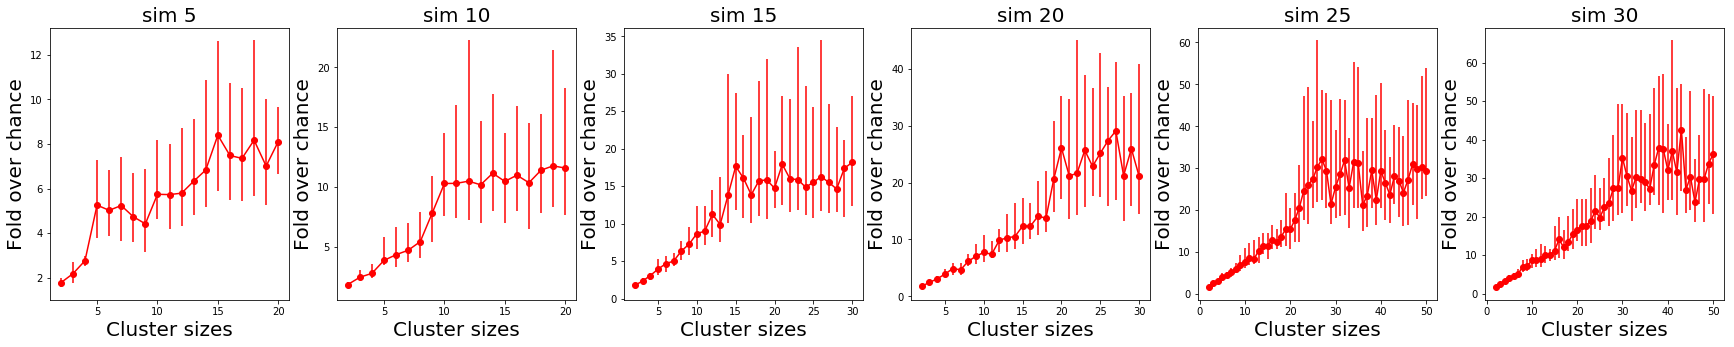

In [69]:
fig1 = plt.figure(figsize=(30,5))
for j,n in zip(range(6), num):
    fig1.add_subplot(1, 6, j+1)
    plot_clustering_results('/Users/ahyeon/Desktop/activ misc/sim{}_results.h5'.format(n), 'foc', specific_plot_name='sim {}'.format(n))
plt.savefig('/Users/ahyeon/Desktop/activ misc/fig1.png')
plt.show()

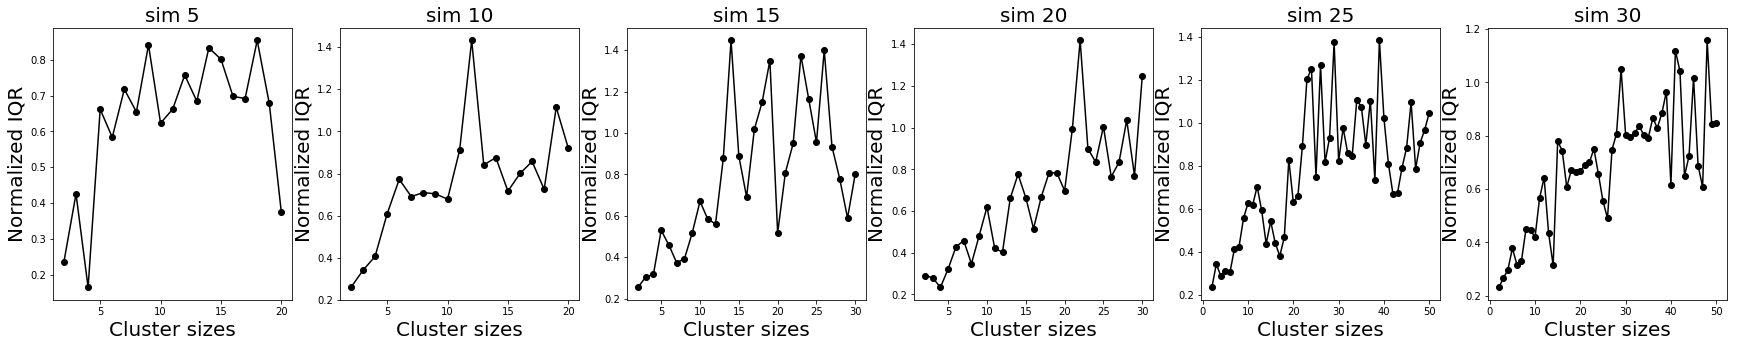

In [70]:
fig2 = plt.figure(figsize=(30,5))
for j,n in zip(range(6), num):
    fig2.add_subplot(1, 6, j+1)
    plot_clustering_results('/Users/ahyeon/Desktop/activ misc/sim{}_results.h5'.format(n), 'iqr', specific_plot_name='sim {}'.format(n))
plt.savefig('/Users/ahyeon/Desktop/activ misc/fig2.png')
plt.show()

In [80]:
import PIL
list_im = ['/Users/ahyeon/Desktop/activ misc/fig1.png', '/Users/ahyeon/Desktop/activ misc/fig2.png']
imgs    = [ PIL.Image.open(i) for i in list_im ]
imgs_comb = np.vstack(i for i in imgs) 
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb

imgs_comb.save('/Users/ahyeon/Desktop/activ misc/sim_foc_iqr.png', bbox_inches='tight')